In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
# read excel data file
players = pd.read_excel('/Users/abdulazizbardi/Desktop/Tuwaiq_Four_Week-master/My Project/FUT FIFA 22 Players.xlsx')

In [3]:
# check dataset type
type(players)

pandas.core.frame.DataFrame

In [4]:
# display shape of data
players.shape

(17305, 93)

In [5]:
# display a sample of 5 rows from  data 
players.head()

,futbin_id,base_id,resource_id,player_url,short_name,long_name,fut_card_added_date,fut_card_quality,fut_card_revision,fut_card_origin,...,cdm,lwb,rwb,lb,rb,cb,player_face_url,club_logo_url,league_logo_url,nationality_flag_url
0,1,51,51,https://www.futbin.com/22/player/1/alan-shearer,Shearer,Alan Shearer,2021-08-31,Gold - Rare,Icon,Prime,...,67.0,69.0,69.0,68.0,68.0,66.0,https://cdn.futbin.com/content/fifa22/img/play...,https://cdn.futbin.com/content/fifa22/img/club...,https://cdn.futbin.com/content/fifa22/img/leag...,https://cdn.futbin.com/content/fifa22/img/nati...
1,2,239598,239598,https://www.futbin.com/22/player/2/alan-shearer,Shearer,Alan Shearer,2021-08-31,Gold - Rare,Icon,Medium,...,64.0,68.0,68.0,66.0,66.0,63.0,https://cdn.futbin.com/content/fifa22/img/play...,https://cdn.futbin.com/content/fifa22/img/club...,https://cdn.futbin.com/content/fifa22/img/leag...,https://cdn.futbin.com/content/fifa22/img/nati...
2,3,239599,239599,https://www.futbin.com/22/player/3/alan-shearer,Shearer,Alan Shearer,2021-08-31,Gold - Rare,Icon,Base,...,67.0,68.0,68.0,67.0,67.0,66.0,https://cdn.futbin.com/content/fifa22/img/play...,https://cdn.futbin.com/content/fifa22/img/club...,https://cdn.futbin.com/content/fifa22/img/leag...,https://cdn.futbin.com/content/fifa22/img/nati...
3,4,1075,1075,https://www.futbin.com/22/player/4/alessandro-...,Del Piero,Alessandro Del Piero,2021-08-31,Gold - Rare,Icon,Medium,...,65.0,69.0,69.0,64.0,64.0,54.0,https://cdn.futbin.com/content/fifa22/img/play...,https://cdn.futbin.com/content/fifa22/img/club...,https://cdn.futbin.com/content/fifa22/img/leag...,https://cdn.futbin.com/content/fifa22/img/nati...
4,5,238382,238382,https://www.futbin.com/22/player/5/alessandro-...,Del Piero,Alessandro Del Piero,2021-08-31,Gold - Rare,Icon,Prime,...,66.0,70.0,70.0,65.0,65.0,56.0,https://cdn.futbin.com/content/fifa22/img/play...,https://cdn.futbin.com/content/fifa22/img/club...,https://cdn.futbin.com/content/fifa22/img/leag...,https://cdn.futbin.com/content/fifa22/img/nati...


In [6]:
# display column names
players.columns

Index(['futbin_id', 'base_id', 'resource_id', 'player_url', 'short_name',
       'long_name', 'fut_card_added_date', 'fut_card_quality',
       'fut_card_revision', 'fut_card_origin', 'overall', 'club_id',
       'club_name', 'league_id', 'league_name', 'nationality_id',
       'nationality_name', 'player_position', 'age', 'dob', 'height_cm',
       'weight_kg', 'international_reputation', 'preferred_foot', 'weak_foot',
       'skill_moves', 'att_workrate', 'def_workrate', 'body_type', 'real_face',
       'player_traits', 'player_specialities', 'pace', 'pace_acceleration',
       'pace_sprint_speed', 'shooting', 'shooting_positioning',
       'shooting_finishing', 'shooting_shot_power', 'shooting_long_shots',
       'shooting_volleys', 'shooting_penalties', 'passing', 'passing_vision',
       'passing_crossing', 'passing_fk_accuracy', 'passing_short_passing',
       'passing_long_passing', 'passing_curve', 'dribbling',
       'dribbling_agility', 'dribbling_balance', 'dribbling_reactio

In [7]:
# drop unknown and unsed columns
players = players.drop(columns=['base_id','resource_id','player_url','fut_card_added_date','club_id',
       'club_name','league_id','nationality_id','dob','international_reputation','real_face','player_traits',
       'player_specialities','pace_acceleration','pace_sprint_speed','shooting_positioning','shooting_finishing',
       'shooting_shot_power','shooting_long_shots','shooting_volleys','shooting_penalties','passing_vision',
       'passing_crossing','passing_fk_accuracy','passing_short_passing','passing_long_passing','passing_curve',
       'dribbling_agility','dribbling_balance','dribbling_reactions','dribbling_ball_control', 'dribbling_dribbling',
       'dribbling_composure','defending_interceptions','defending_heading_accuracy','defending_marking_awareness',
       'defending_standing_tackle','defending_sliding_tackle','physicality_jumping','physicality_stamina',
       'physicality_strength','physicality_aggression','player_face_url',
       'club_logo_url','league_logo_url','nationality_flag_url','fut_card_origin',])

In [8]:
# check shape of data after droping some columns
players.shape

(17305, 46)

In [9]:
# renaming columns to more meaningful names
players = players.rename(columns={"short_name":"Nick_Name","long_name":"Full_Name","fut_card_quality":"Card_Quality",
                                  "fut_card_revision":"Card_Type","fut_card_origin":"Card_Origin",
                                  "overall":"Overall_Rating"})

In [10]:
# capitalize column names
players.columns = map(str.capitalize, players.columns)

In [11]:
# check column names after droping some columns
players.columns

Index(['Futbin_id', 'Nick_name', 'Full_name', 'Card_quality', 'Card_type',
       'Overall_rating', 'League_name', 'Nationality_name', 'Player_position',
       'Age', 'Height_cm', 'Weight_kg', 'Preferred_foot', 'Weak_foot',
       'Skill_moves', 'Att_workrate', 'Def_workrate', 'Body_type', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
       'Gk_diving', 'Gk_handling', 'Gk_kicking', 'Gk_reflexes', 'Gk_speed',
       'Gk_positioning', 'St', 'Lw', 'Rw', 'Lf', 'Rf', 'Cf', 'Cam', 'Lm', 'Rm',
       'Cm', 'Cdm', 'Lwb', 'Rwb', 'Lb', 'Rb', 'Cb'],
      dtype='object')

In [12]:
# display dataframe information
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Futbin_id         17305 non-null  int64  
 1   Nick_name         17305 non-null  object 
 2   Full_name         17305 non-null  object 
 3   Card_quality      17305 non-null  object 
 4   Card_type         17305 non-null  object 
 5   Overall_rating    17305 non-null  int64  
 6   League_name       17305 non-null  object 
 7   Nationality_name  17305 non-null  object 
 8   Player_position   17305 non-null  object 
 9   Age               17305 non-null  int64  
 10  Height_cm         17305 non-null  int64  
 11  Weight_kg         17305 non-null  int64  
 12  Preferred_foot    17305 non-null  object 
 13  Weak_foot         17305 non-null  int64  
 14  Skill_moves       17305 non-null  int64  
 15  Att_workrate      17301 non-null  object 
 16  Def_workrate      17301 non-null  object

In [13]:
# display a sample of 10 rows from data after changes 
players.head(10)

,Futbin_id,Nick_name,Full_name,Card_quality,Card_type,Overall_rating,League_name,Nationality_name,Player_position,Age,...,Cam,Lm,Rm,Cm,Cdm,Lwb,Rwb,Lb,Rb,Cb
0,1,Shearer,Alan Shearer,Gold - Rare,Icon,91,Icons,England,ST,51,...,82.0,81.0,81.0,77.0,67.0,69.0,69.0,68.0,68.0,66.0
1,2,Shearer,Alan Shearer,Gold - Rare,Icon,89,Icons,England,ST,51,...,80.0,81.0,81.0,75.0,64.0,68.0,68.0,66.0,66.0,63.0
2,3,Shearer,Alan Shearer,Gold - Rare,Icon,87,Icons,England,ST,51,...,79.0,79.0,79.0,76.0,67.0,68.0,68.0,67.0,67.0,66.0
3,4,Del Piero,Alessandro Del Piero,Gold - Rare,Icon,90,Icons,Italy,CF,46,...,89.0,89.0,89.0,83.0,65.0,69.0,69.0,64.0,64.0,54.0
4,5,Del Piero,Alessandro Del Piero,Gold - Rare,Icon,92,Icons,Italy,CF,46,...,91.0,90.0,90.0,85.0,66.0,70.0,70.0,65.0,65.0,56.0
5,6,Del Piero,Alessandro Del Piero,Gold - Rare,Icon,87,Icons,Italy,CF,46,...,87.0,87.0,87.0,81.0,64.0,68.0,68.0,64.0,64.0,53.0
6,7,Nesta,Alessandro Nesta,Gold - Rare,Icon,92,Icons,Italy,CB,45,...,64.0,66.0,66.0,71.0,85.0,81.0,81.0,83.0,83.0,90.0
7,8,Nesta,Alessandro Nesta,Gold - Rare,Icon,90,Icons,Italy,CB,45,...,62.0,64.0,64.0,69.0,82.0,79.0,79.0,81.0,81.0,88.0
8,9,Nesta,Alessandro Nesta,Gold - Rare,Icon,88,Icons,Italy,CB,45,...,63.0,64.0,64.0,69.0,82.0,78.0,78.0,80.0,80.0,87.0
9,10,Deco,Anderson Luís de Souza,Gold - Rare,Icon,90,Icons,Portugal,CM,44,...,89.0,88.0,88.0,88.0,73.0,74.0,74.0,70.0,70.0,60.0


In [14]:
# check unique values of card quality
players['Card_quality'].unique()

array(['Gold - Rare', 'Gold - Non-Rare', 'Silver - Rare',
       'Silver - Non-Rare', 'Bronze - Rare', 'Bronze - Non-Rare'],
      dtype=object)

In [15]:
# check unique values of card type
players['Card_type'].unique()

array(['Icon', 'Hero', 'Rare', 'Non-Rare', 'OTW', 'Normal', 'non-rare',
       'Sudamericana', 'Libertadores', 'Objectives', 'FUT VIP', 'IF',
       'OTW SBC', 'OTW Obj'], dtype=object)

In [16]:
# categories players position to be in 4 classes (attackers - midfielders - defenders - keepers)
attackers = ['RF','ST','LW','LF','RS','LS','RW','CF']
midfielders = ['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM']
defenders = ['RCB','CB','LCB','LB','RB','RWB','LWB']
players['General_position'] = ""
players['General_position'] = np.where(players['Player_position'].isin(attackers),'Attacker',
np.where(players['Player_position'].isin(midfielders),'Midfielder',
np.where(players['Player_position'].isin(defenders),'Defender','Goal Keeper')))
players[['Nick_name','General_position']].head(10)

,Nick_name,General_position
0,Shearer,Attacker
1,Shearer,Attacker
2,Shearer,Attacker
3,Del Piero,Attacker
4,Del Piero,Attacker
5,Del Piero,Attacker
6,Nesta,Defender
7,Nesta,Defender
8,Nesta,Defender
9,Deco,Midfielder


<AxesSubplot:xlabel='Overall_rating', ylabel='count'>

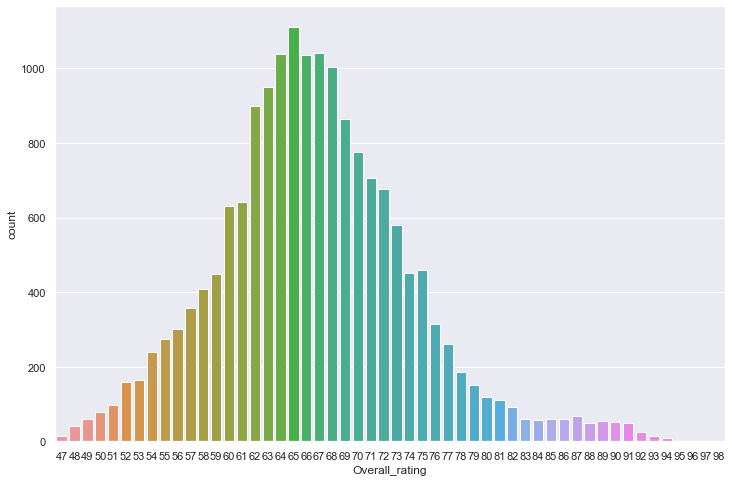

In [17]:
# count plot of overall rating
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(players['Overall_rating'])

<AxesSubplot:xlabel='Player_position', ylabel='count'>

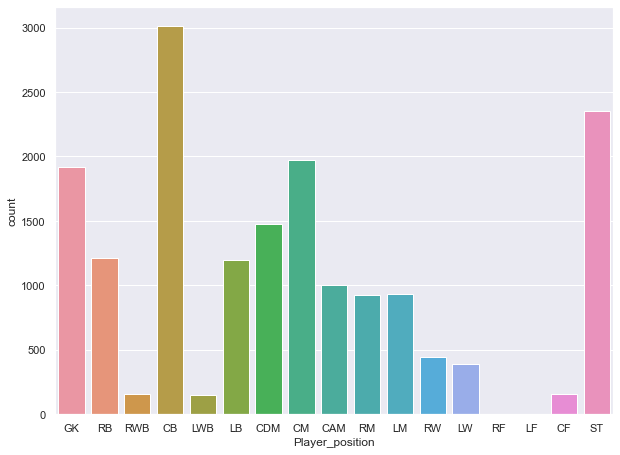

In [18]:
# count plot of player position sorted by positions as (Keeper - Defense - Midfield - Attack)
sns.set(rc={'figure.figsize':(10,7.5)})
sns.countplot(players['Player_position'], 
              order = ['GK','RB','RWB','CB','LWB','LB','CDM','CM','CAM','RM','LM','RW','LW','RF','LF','CF','ST'])

In [19]:
# getting the top player by Overall Rating for each position
players_top_pos = players.loc[players.groupby(players['Player_position'])['Overall_rating'].idxmax()]
players_top_players_by_pos = players_top_pos.loc[:,['Nick_name','Overall_rating','Player_position']]
players_top_players_by_pos.sort_values(by='Overall_rating',ascending=False)

,Nick_name,Overall_rating,Player_position
61,Pelé,98,CAM
264,Ronaldo,96,ST
62,Pelé,95,CF
173,Yashin,94,GK
215,Maldini,94,CB
261,Ronaldinho,94,LW
184,Garrincha,94,RW
176,Matthäus,93,CM
30,Capita,93,RB
336,Cafú,93,RWB


In [20]:
# display top 10 players based on pace attribute
players_top_pace = players[['Nick_name','Nationality_name','Player_position','Pace','Age',
                            'Height_cm','Weight_kg']].sort_values(by='Pace',ascending=False).head(10)
players_top_pace

,Nick_name,Nationality_name,Player_position,Pace,Age,Height_cm,Weight_kg
14106,Mbappé,France,ST,97.0,22,182,73
264,Ronaldo,Brazil,ST,97.0,45,183,78
321,Mbappé,France,ST,97.0,22,182,73
62,Pelé,Brazil,CF,96.0,81,173,69
17250,Vinícius,Brazil,LW,96.0,21,176,73
346,Davies,Canada,LB,96.0,20,183,75
4695,Adama Traoré,Spain,RW,96.0,25,178,72
344,Vinícius,Brazil,LW,95.0,21,176,73
61,Pelé,Brazil,CAM,95.0,81,173,70
187,Overmars,Netherlands,LW,95.0,48,173,71


In [21]:
# display top 10 players based on shoot attribute
players_top_shoot = players[['Nick_name','Nationality_name','Player_position','Shooting','Age',
                            'Preferred_foot','Weak_foot']].sort_values(by='Shooting',ascending=False).head(10)
players_top_shoot

,Nick_name,Nationality_name,Player_position,Shooting,Age,Preferred_foot,Weak_foot
81,Puskás,Hungary,CF,96.0,94,Left,3
61,Pelé,Brazil,CAM,96.0,81,Right,4
82,Puskás,Hungary,ST,95.0,94,Left,3
264,Ronaldo,Brazil,ST,95.0,45,Right,5
76,Eusébio,Portugal,CF,94.0,79,Right,5
193,Van Basten,Netherlands,ST,94.0,57,Right,4
335,Van Persie,Netherlands,ST,94.0,38,Left,0
266,Ronaldo,Brazil,ST,93.0,45,Right,5
72,Cantona,France,CF,93.0,55,Right,4
77,Eusébio,Portugal,CF,93.0,79,Right,5


In [22]:
# display top 10 players based on pass attribute
players_top_pass = players[['Nick_name','Nationality_name','Player_position','Passing','Age',
                            'Preferred_foot','Weak_foot']].sort_values(by='Passing',ascending=False).head(10)
players_top_pass

,Nick_name,Nationality_name,Player_position,Passing,Age,Preferred_foot,Weak_foot
302,Zidane,France,CAM,96.0,49,Right,5
297,Xavi,Spain,CM,95.0,41,Right,3
44,Beckham,England,RM,95.0,46,Right,3
12,Pirlo,Italy,CM,95.0,42,Right,4
184,Garrincha,Brazil,RW,94.0,88,Right,4
301,Zidane,France,CAM,93.0,49,Right,5
61,Pelé,Brazil,CAM,93.0,81,Right,4
161,Riquelme,Argentina,CAM,93.0,43,Right,4
376,De Bruyne,Belgium,CM,93.0,30,Right,5
13,Pirlo,Italy,CM,93.0,42,Right,4


In [23]:
# display top 10 players based on dribble attribute
players_top_dribble = players[['Nick_name','Nationality_name','Player_position','Dribbling','Age',
                            'Skill_moves']].sort_values(by='Dribbling',ascending=False).head(10)
players_top_dribble

,Nick_name,Nationality_name,Player_position,Dribbling,Age,Skill_moves
57,Maradona,Argentina,CAM,97.0,61,5
184,Garrincha,Brazil,RW,96.0,88,5
61,Pelé,Brazil,CAM,96.0,81,5
59,Maradona,Argentina,CAM,95.0,61,5
302,Zidane,France,CAM,95.0,49,5
624,Messi,Argentina,RW,95.0,34,4
264,Ronaldo,Brazil,ST,95.0,45,5
261,Ronaldinho,Brazil,LW,95.0,41,5
368,Messi,Argentina,RW,95.0,34,4
62,Pelé,Brazil,CF,95.0,81,5


In [24]:
# display top 10 players based on defense attribute
players_top_defend = players[['Nick_name','Nationality_name','Player_position','Defending',
                              'Age']].sort_values(by='Defending',ascending=False).head(10)
players_top_defend

,Nick_name,Nationality_name,Player_position,Defending,Age
215,Maldini,Italy,CB,96.0,53
93,Baresi,Italy,CB,95.0,61
216,Maldini,Italy,CB,95.0,53
78,Cannavaro,Italy,CB,95.0,48
6,Nesta,Italy,CB,94.0,45
95,Baresi,Italy,CB,94.0,61
28,Puyol,Spain,CB,94.0,43
84,Hierro,Spain,CB,93.0,53
29,Puyol,Spain,CB,93.0,43
211,Vidić,Serbia,CB,93.0,40


In [25]:
# display top 10 players based on physical attribute
players_top_physical = players[['Nick_name','Nationality_name','Player_position','Physicality',
                              'Age','Body_type','Height_cm',
                              'Weight_kg']].sort_values(by='Physicality',ascending=False).head(10)
players_top_physical

,Nick_name,Nationality_name,Player_position,Physicality,Age,Body_type,Height_cm,Weight_kg
72,Cantona,France,CF,92.0,55,High & Average,188,89
29,Puyol,Spain,CB,91.0,43,Stocky,178,80
211,Vidić,Serbia,CB,91.0,40,High & Average,190,84
222,Vieira,France,CM,91.0,45,High & Average+,192,83
105,Gattuso,Italy,CDM,90.0,43,Stocky,177,76
290,Campbell,England,CB,90.0,47,High & Stocky,188,90
364,Casemiro,Brazil,CDM,90.0,29,Unique,185,84
28,Puyol,Spain,CB,90.0,43,Stocky,178,80
74,Cantona,France,CF,90.0,55,High & Average,188,82
73,Cantona,France,CF,90.0,55,High & Average,188,89


<AxesSubplot:xlabel='Nationality_name', ylabel='count'>

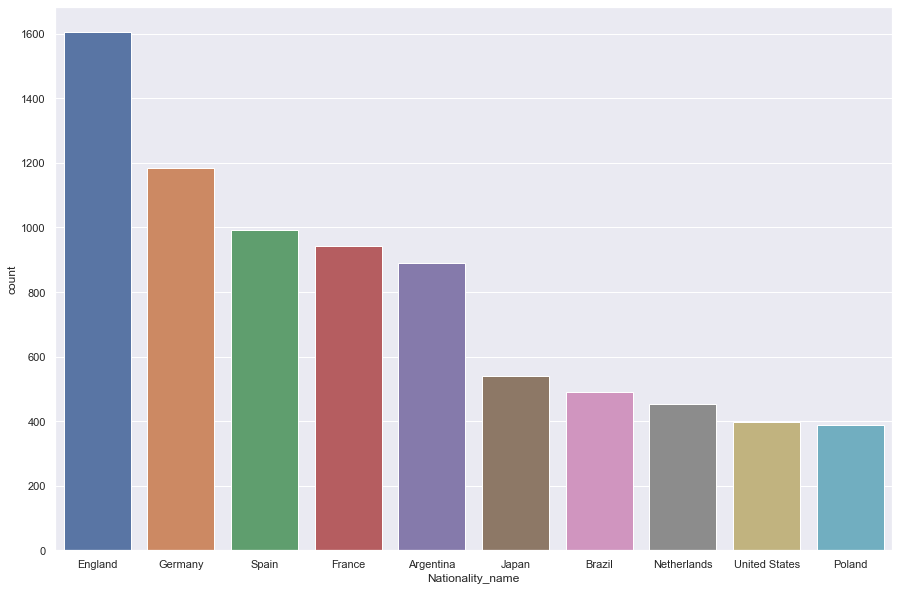

In [26]:
# count plot of player nationality
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(players['Nationality_name'],
              order=pd.value_counts(players['Nationality_name']).iloc[:10].index)

Text(0, 0.5, 'Count')

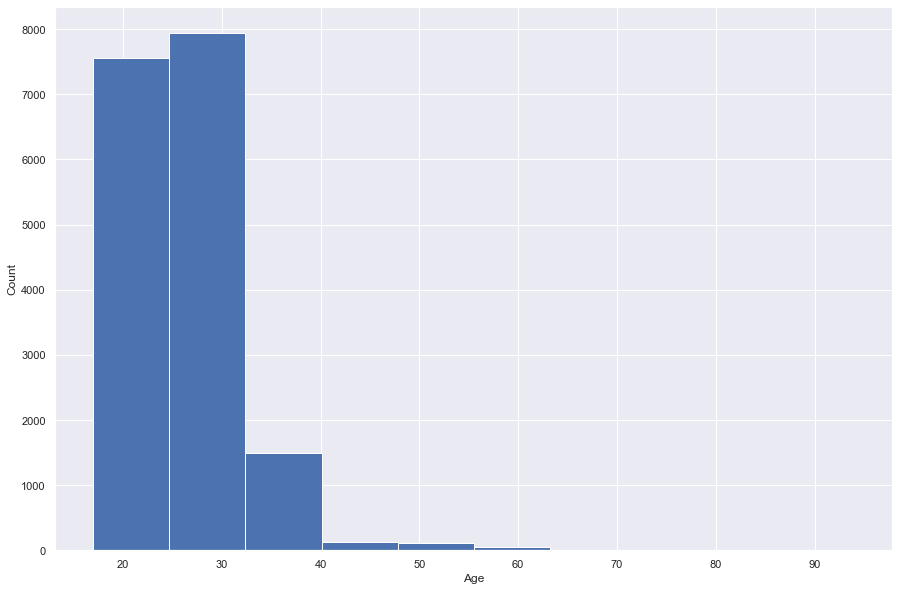

In [27]:
# histogram for age distribution
plt.hist(players['Age'])
plt.xlabel('Age')
plt.ylabel('Count')

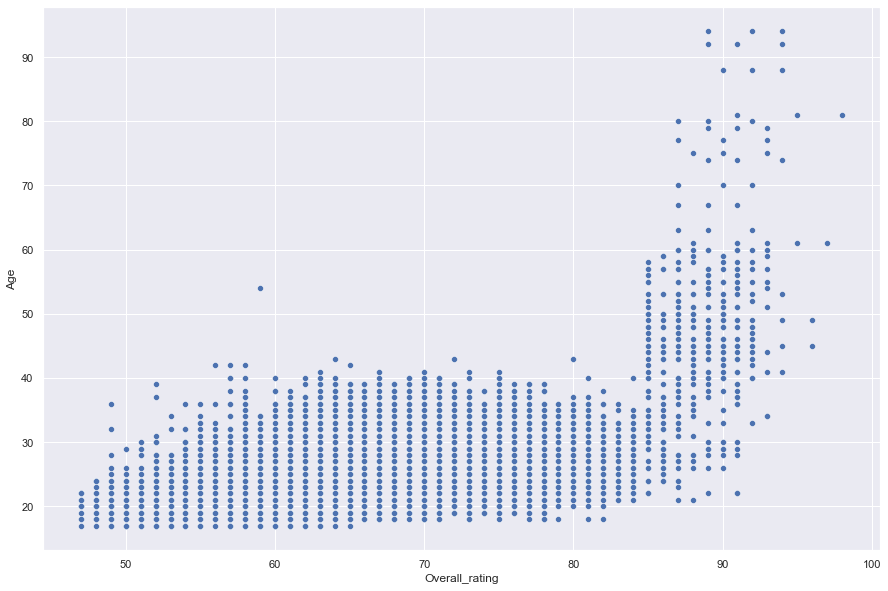

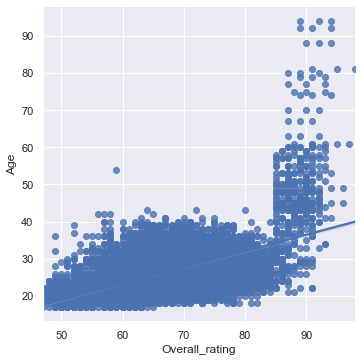

In [28]:
# scatter plot between overall rating and age
sns.scatterplot(players['Overall_rating'], players['Age'])
sns.lmplot(x="Overall_rating", y="Age", data=players)

<AxesSubplot:xlabel='General_position', ylabel='count'>

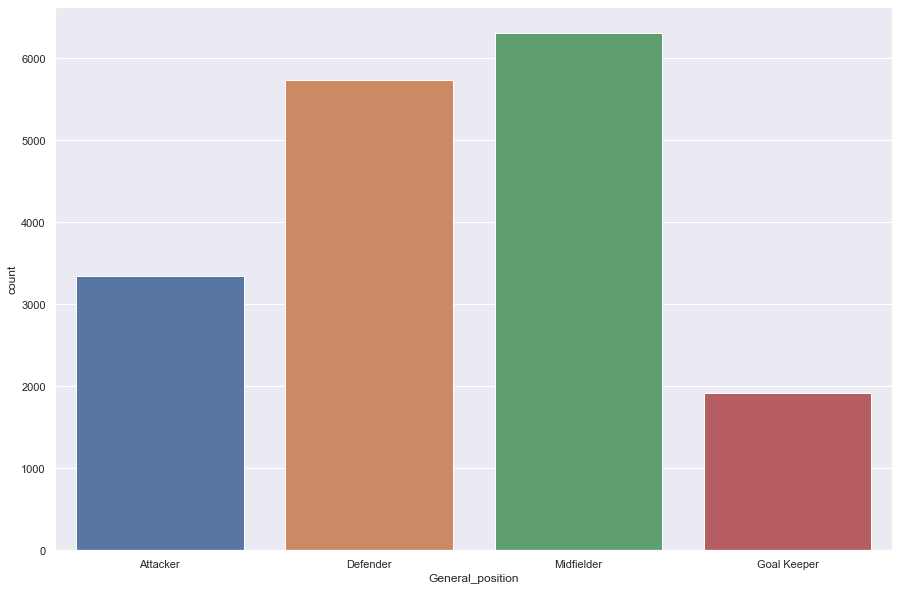

In [29]:
# count plot of player general position
sns.countplot(players['General_position'])

In [30]:
# getting the correlation between the variables
corr = players[['Age','Overall_rating','Card_type','League_name', 'Nationality_name', 'Player_position',
               'Height_cm', 'Weight_kg', 'Preferred_foot', 'Weak_foot',
       'Skill_moves', 'Att_workrate', 'Def_workrate', 'Body_type', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']].corr()

<AxesSubplot:>

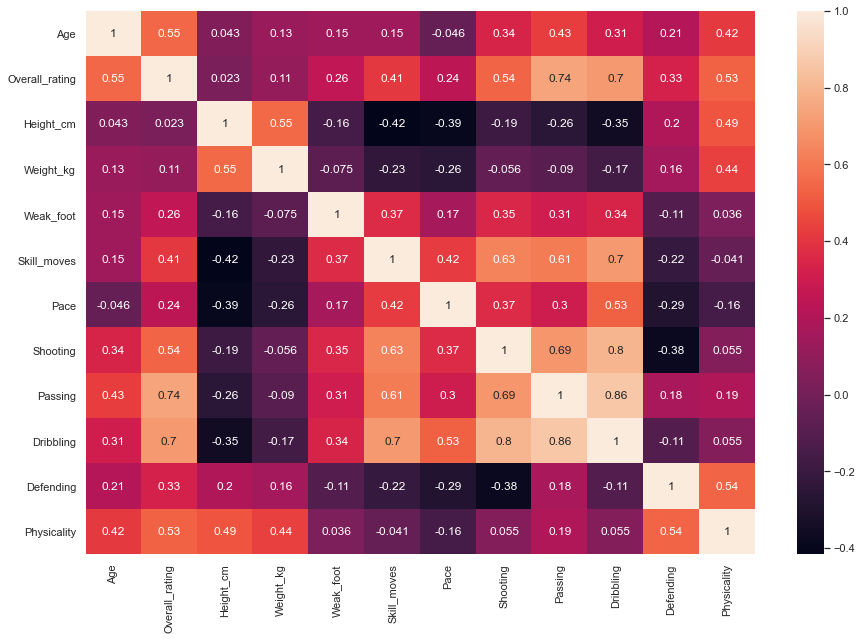

In [31]:
# displaying the correlation in heatmap
sns.heatmap(corr, annot=True)

In [32]:
#league = players['League_name'].str.get_dummies()
#nationality = players['Nationality_name'].str.get_dummies()
#pFoot = players['Preferred_foot'].str.get_dummies()
#aWR = players['Att_workrate'].str.get_dummies()
#dWR = players['Def_workrate'].str.get_dummies()
#bT = players['Body_type'].str.get_dummies()
#remainA = players[['Futbin_id', 'Age', 'Height_cm', 'Weight_kg', 'Weak_foot',
#'Skill_moves', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']]
#x = pd.concat([remainA, league, nationality, pFoot, aWR, dWR, bT], axis=1)
#x = x.fillna(0)

In [33]:
#cardQ = players['Card_quality'].str.get_dummies()
#cardT = players['Card_type'].str.get_dummies()
#pPosition = players['Player_position'].str.get_dummies()
#y = pd.concat([players['Overall_rating'], cardQ, cardT, pPosition], axis=1)
#y = y.dropna()

In [34]:
# dropping GK players
playersNoGK = players.drop(players.loc[players['Player_position'] == 'GK'].index)

In [35]:
# get data for y variable to be splitted later to train and test
y = playersNoGK['General_position']
y

0          Attacker
1          Attacker
2          Attacker
3          Attacker
4          Attacker
            ...    
17300    Midfielder
17301      Attacker
17302    Midfielder
17303      Defender
17304      Defender
Name: General_position, Length: 15390, dtype: object

In [36]:
# get data for x variable but made it to x1 and x2
# x1 are all integers columns
# x2 are all strings columns that later will be encoded
x = playersNoGK[['Futbin_id','Overall_rating','Age','Height_cm','Weight_kg','Weak_foot',
       'Skill_moves','Pace','Shooting','Passing','Dribbling','Defending','Physicality']]
x.isnull().sum()

Futbin_id         0
Overall_rating    0
Age               0
Height_cm         0
Weight_kg         0
Weak_foot         0
Skill_moves       0
Pace              0
Shooting          0
Passing           0
Dribbling         0
Defending         0
Physicality       0
dtype: int64

In [37]:
#features_selection = ['Futbin_id','Overall_rating','Age','Height_cm','Weight_kg','Weak_foot',
   #    'Skill_moves','Pace','Shooting','Passing','Dribbling','Defending','Physicality',
   #    'Gk_diving','Gk_handling','Gk_kicking','Gk_reflexes','Gk_speed','Gk_positioning',
   #    'St','Lw','Rw','Lf','Rf','Cf','Cam','Lm','Rm','Cm','Cdm','Lwb','Rwb','Lb','Rb','Cb']
#x = pd.DataFrame(players, columns = features_selection)

In [38]:
#x = players[['Futbin_id','Overall_rating','Age','Height_cm','Weight_kg','Weak_foot',
   #   'Skill_moves','Pace','Shooting','Passing','Dribbling','Defending','Physicality',
   #    'Gk_diving','Gk_handling','Gk_kicking','Gk_reflexes','Gk_speed','Gk_positioning',
   #    'St','Lw','Rw','Lf','Rf','Cf','Cam','Lm','Rm','Cm','Cdm','Lwb','Rwb','Lb','Rb','Cb']]
#x.fillna(0)

In [39]:
# x2 being encoded to be integers by LabelEncoder
# x1 and x2 concatnated to x to be splitted later to train and test
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)
y
#x2 = x2.apply(labelEncoder.fit_transform)
#x = pd.concat([x1,x2],axis=1)
#x = x.fillna(0)
#x

array([0, 0, 0, ..., 2, 1, 1])

In [40]:
# making the x_train, x_test, y_train, y_test split from x and y
# test size being 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [41]:
# selecting columns to be used to find similarities 
attributes = players.loc[:,['Overall_rating']]
position = players['Player_position'].str.get_dummies(sep = ' ')
attributes = pd.concat([attributes, position], axis = 1)
newAttributes = attributes
attributes = attributes.dropna()
newAttributes['Nick_name'] = players['Nick_name']
newAttributes['Card_type'] = players['Card_type']
newAttributes['Player_position'] = players['Player_position']
newAttributes = newAttributes.dropna()
print(attributes.columns)
print("*************************************************************************")
print(newAttributes.columns)

Index(['Overall_rating', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LF',
       'LM', 'LW', 'LWB', 'RB', 'RF', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')
*************************************************************************
Index(['Overall_rating', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LF',
       'LM', 'LW', 'LWB', 'RB', 'RF', 'RM', 'RW', 'RWB', 'ST', 'Nick_name',
       'Card_type', 'Player_position'],
      dtype='object')


In [42]:
# applying StandardScaler and fit transform the attributes data frame
scaler = StandardScaler()
scalerFit = scaler.fit_transform(attributes)

In [43]:
# applying NearestNeighbors and fit scalerFit
recommendPlayers = NearestNeighbors(n_neighbors = 10)
recommendPlayers.fit(scalerFit)

NearestNeighbors(n_neighbors=10)

In [44]:
# apply kneighbors of scalerFit
playerIndex = recommendPlayers.kneighbors(scalerFit)[1]

In [45]:
# function to get player index from newAttributes data frame
def getPlayerIndex(name):
    return newAttributes[newAttributes['Nick_name'] == name].index.tolist()[0]

In [46]:
# function to get player position from newAttributes data frame
def getPlayerPosition(name):
    playerPos = []
    playerPos = newAttributes[newAttributes['Nick_name'] == name]['Player_position']
    return playerPos.iloc[0]

In [47]:
# function returns the recommender player information
def playerInfo(p):
    print("\033[1m" + "The Recommender Player: " + players.loc[getPlayerIndex(p)]['Nick_name'], "|",
              players.loc[getPlayerIndex(p)]['Overall_rating'], "|",
              players.loc[getPlayerIndex(p)]['Card_type'], "|",
              players.loc[getPlayerIndex(p)]['Card_quality'], "|",
              players.loc[getPlayerIndex(p)]['Player_position'] + "\033[0m")

In [48]:
# function that recommend players similar to the recommender player
def recommendPlayers(player):
    playerInfo(player)
    print("The Recommended Players: ".format(player))
    pos = getPlayerPosition(player)
    index = getPlayerIndex(player)
    for i in playerIndex[index][1:]:
        if (pos == players.iloc[i]['Player_position']):
            print(players.iloc[i]['Nick_name'], "|",
                players.iloc[i]['Overall_rating'], "|",
                players.iloc[i]['Card_type'], "|",
                players.iloc[i]['Card_quality'], "|",
                players.iloc[i]['Player_position'])

In [49]:
recommendPlayers('Salah')

The Recommender Player: Salah | 89 | Rare | Gold - Rare | RW
The Recommended Players: 
Salah | 90 | IF | Gold - Rare | RW
Best | 90 | Icon | Gold - Rare | RW
Luís Figo | 90 | Icon | Gold - Rare | RW
Garrincha | 90 | Icon | Gold - Rare | RW
Best | 88 | Icon | Gold - Rare | RW
Di María | 87 | Normal | Gold - Rare | RW
Cole | 87 | Hero | Gold - Rare | RW
Jesus | 86 | IF | Gold - Rare | RW
Mahrez | 86 | Rare | Gold - Rare | RW


In [50]:
recommendPlayers('Upamecano')

The Recommender Player: Upamecano | 82 | Normal | Gold - Rare | CB
The Recommended Players: 
Romero | 82 | Normal | Gold - Rare | CB
Gomez | 82 | Normal | Gold - Rare | CB
Romagnoli | 82 | Normal | Gold - Non-Rare | CB
Aritz Elustondo | 82 | IF | Gold - Rare | CB
Gabriel Paulista | 82 | Normal | Gold - Rare | CB
Pau Torres | 82 | Normal | Gold - Rare | CB
Mario Hermoso | 82 | Normal | Gold - Rare | CB
Lenglet | 82 | Normal | Gold - Rare | CB
David García | 82 | IF | Gold - Rare | CB


In [51]:
recommendPlayers('De Gea')

The Recommender Player: De Gea | 84 | Normal | Gold - Rare | GK
The Recommended Players: 
De Gea | 84 | Normal | Gold - Rare | GK
Bounou | 84 | IF | Gold - Rare | GK
Maignan | 84 | Normal | Gold - Rare | GK
Hrádecký | 85 | IF | Gold - Rare | GK
Schmeichel | 85 | Normal | Gold - Rare | GK
Gulácsi | 85 | Normal | Gold - Rare | GK
Sommer | 85 | Normal | Gold - Rare | GK
Mendy | 83 | Rare | Gold - Rare | GK
Leno | 83 | Normal | Gold - Rare | GK


In [52]:
recommendPlayers('Mbappé')

The Recommender Player: Mbappé | 91 | Rare | Gold - Rare | ST
The Recommended Players: 
Owen | 91 | Icon | Gold - Rare | ST
Ronaldo | 91 | OTW | Gold - Rare | ST
Ronaldo | 91 | Rare | Gold - Rare | ST
Van Basten | 91 | Icon | Gold - Rare | ST
Rooney | 91 | Icon | Gold - Rare | ST
Shevchenko | 91 | Icon | Gold - Rare | ST
Mbappé | 91 | FUT VIP | Gold - Rare | ST
Drogba | 91 | Icon | Gold - Rare | ST
Shearer | 91 | Icon | Gold - Rare | ST


In [53]:
# applying Gaussian Naive Bayes
# fitting x_train and y_train
# getting prediction for x_train, getting prediction for y_train
nb = GaussianNB()
nb.fit(x_train, y_train)
x_predNb = nb.predict(x_train)
y_predNb = nb.predict(x_test)

In [54]:
# applying KNeighbor Classifier
# fitting x_train and y_train
# getting prediction for x_train, getting prediction for y_train
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x_train, y_train)
x_predKnc = knc.predict(x_train)
y_predKnc = knc.predict(x_test)

In [55]:
print('K-Nearest Neighbor')
print('Test Accuracy Score: ', accuracy_score(y_predKnc, y_test)*100)
print('Test Recall Score: ', recall_score(y_test, y_predKnc, average='micro')*100)
print('Test F1 Score: ', f1_score(y_test, y_predKnc, average='micro')*100)

K-Nearest Neighbor
Test Accuracy Score:  68.58349577647823
Test Recall Score:  68.58349577647823
Test F1 Score:  68.58349577647823


In [56]:
print('K-Nearest Neighbor')
print('Train Accuracy Score: ', accuracy_score(x_predKnc, y_train)*100)
print('Train Recall Score: ', recall_score(y_train, x_predKnc, average='micro')*100)
print('Train F1 Score: ', f1_score(y_train, x_predKnc, average='micro')*100)

K-Nearest Neighbor
Train Accuracy Score:  85.7699805068226
Train Recall Score:  85.7699805068226
Train F1 Score:  85.76998050682259


In [57]:
print('Naive Bayes')
print('Test Accuracy Score: ', accuracy_score(y_predNb, y_test)*100)
print('Test Recall Score: ', recall_score(y_test, y_predNb, average='micro')*100)
print('Test F1 Score: ', f1_score(y_test, y_predNb, average='micro')*100)

Naive Bayes
Test Accuracy Score:  74.13905133203379
Test Recall Score:  74.13905133203379
Test F1 Score:  74.13905133203377


In [58]:
print('Naive Bayes')
print('Train Accuracy Score: ', accuracy_score(x_predNb, y_train)*100)
print('Train Recall Score: ', recall_score(y_train, x_predNb, average='micro')*100)
print('Train F1 Score: ', f1_score(y_train, x_predNb, average='micro')*100)

Naive Bayes
Train Accuracy Score:  75.38986354775828
Train Recall Score:  75.38986354775828
Train F1 Score:  75.38986354775827
